In [1]:
import pandas as pd
import fnmatch
import cv2
import numpy as np
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.utils import to_categorical
import pickle
import time
import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [3]:
#Reading data lab tested data in csv
Lab_tested_data = pd.read_csv('C:\\Users\\Mahmood Yousaf\\Desktop\\FYP\\Final-Year-Project-Soil-Analysis-using-machine-learning\\Source Code\\Lab Results\\Lab_tested_results.csv')

In [4]:
Sample_ID = Lab_tested_data.iloc[:,0]
OM_Value = Lab_tested_data.iloc[:,3]

In [5]:
def load_images_from_folder(folder):
    Labels = []
    image_counter = 0
    for filename in os.listdir(folder):
        x = filename.split("_")
        id = float(x[0])
        img = cv2.imread(os.path.join(folder,filename))
        width = 1000
        height = 1000
        dim = (width, height)
        # resize image
        img = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
        img = img[500:800,500:800] #Resizing the image
        kernel = np.array([[-1,-1,-1], 
                   [-1, 9,-1],
                   [-1,-1,-1]])
        img = cv2.filter2D(img, -1, kernel) # applying the sharpening kernel.
        Result = Sample_ID.isin([id])
        Result = Sample_ID[Result]
        #Checking that there should be sample id exists
        if len(Result) >= 1:
            print(image_counter)
            image_counter = image_counter + 1
            #Checking for outer and inner surface values
            if len(Result) == 2:  
                Result = Sample_ID[Sample_ID==Result.iloc[1]].index.tolist()
                Id_1_index = Result[0]
                Id_2_index = Result[1]
                #Average of both inner and surface image soil result 
                avg_OM_lab_value = (OM_Value[Id_2_index] + OM_Value[Id_2_index]) / 2
                Labels.append([filename,img,avg_OM_lab_value])
            #Checking only value can also be possible 
            elif len(Result==1):
                Result = Sample_ID[Sample_ID==Result.iloc[1]].index.tolist()
                Id_1_index = Result[0]
                OM_lab_value = OM_Value[Id_1_index]
                Labels.append([filename,img,OM_lab_value])
        #Checking there is no mactch than continue the looping 
        else:
            continue
    return Labels

In [6]:
dataset = load_images_from_folder('C:\\Users\\Mahmood Yousaf\\Desktop\\FYP\\Dataset RGB\\training_data')

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [7]:
X = []
Y = []
for data in dataset:
    X.append(data[1])
    Y.append(data[2])
print(Y)

[0.54, 0.54, 0.55, 0.55, 1.2, 1.2, 1.1, 1.1, 1.5, 1.5, 0.88, 0.88, 0.351, 0.351, 1.21, 1.21, 0.98, 0.98, 1.62, 1.62, 1.14, 1.14, 1.1, 1.1, 1.1, 1.1, 2.1, 2.1, 0.93, 0.93, 0.15, 0.15, 0.84, 0.84, 0.73, 0.73, 0.71, 0.71, 0.91, 0.91, 0.96, 0.96, 0.85, 0.85, 0.74, 0.74, 1.01, 1.01, 0.92, 0.92, 0.96, 0.96, 1.6, 1.6, 1.68, 1.68, 1.09, 1.09, 1.09, 1.09, 1.45, 1.45, 1.09, 1.09, 0.84, 0.84, 0.92, 0.92, 1.95, 1.95, 1.06, 1.06, 1.95, 1.95, 1.3, 1.3, 1.01, 1.01, 1.32, 1.32, 1.29, 1.29, 1.33, 1.33, 1.1, 1.1, 1.53, 1.53, 1.74, 1.74, 0.77, 0.77, 2.17, 2.17, 1.05, 1.05, 1.2, 1.2, 0.91, 0.91, 1.19, 1.19, 4.05, 4.05, 1.15, 1.15, 0.26, 0.26, 0.98, 0.98, 1.53, 1.53, 1.08, 1.08, 1.53, 1.53, 1.85, 1.85, 1.22, 1.22, 0.8, 0.8, 0.81, 0.81, 0.93, 0.93, 0.81, 0.81, 1.0, 1.0, 0.98, 0.98, 1.01, 1.01, 1.76, 1.76, 1.02, 1.02, 1.7, 1.7, 0.88, 0.88, 1.15, 1.15, 1.77, 1.77, 1.13, 1.13, 0.44, 0.44, 1.08, 1.08, 1.11, 1.11, 0.82, 0.82, 1.44, 1.44, 1.02, 1.02, 1.09, 1.09, 1.09, 1.09, 1.31, 1.31, 0.97, 0.97, 1.15, 1.15, 0.1

In [8]:
img_size = 300
X = np.array(X).reshape(-1, img_size, img_size, 3)
print(X[0].shape)
Y = np.array(Y)
print(Y)

(300, 300, 3)
[0.54 0.54 0.55 ... 1.1  0.45 0.45]


In [9]:
len(X)

1064

In [10]:
#AlexNet Architecture for P estimation
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(300,300,3)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation='linear')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 73, 73, 96)        34944     
_________________________________________________________________
batch_normalization (BatchNo (None, 73, 73, 96)        384       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 36, 36, 96)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 36, 36, 256)       614656    
_________________________________________________________________
batch_normalization_1 (Batch (None, 36, 36, 256)       1024      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 17, 17, 256)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 17, 17, 384)       8

In [11]:
X_train, X_val, y_train, y_val = train_test_split(X, Y)
print(X_train.shape)

(798, 300, 300, 3)


In [12]:
model.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])
history=model.fit(X_train, y_train, epochs=300, batch_size=32, verbose=1, validation_split=0.4)
predictions = model.predict(X_val)

Epoch 1/300
15/15 [==============================] - 10s 400ms/step - loss: 23214.1055 - mse: 23214.1055 - mae: 64.0863 - val_loss: 1489403648.0000 - val_mse: 1489403648.0000 - val_mae: 38422.5625
Epoch 2/300
15/15 [==============================] - 3s 192ms/step - loss: 314.7763 - mse: 314.7763 - mae: 12.1684 - val_loss: 23175.8281 - val_mse: 23175.8281 - val_mae: 140.7528
Epoch 3/300
15/15 [==============================] - 3s 191ms/step - loss: 180.7859 - mse: 180.7859 - mae: 7.2832 - val_loss: 221893.6250 - val_mse: 221893.6250 - val_mae: 467.3008
Epoch 4/300
15/15 [==============================] - 3s 192ms/step - loss: 95.2114 - mse: 95.2114 - mae: 6.1444 - val_loss: 205011.3438 - val_mse: 205011.3438 - val_mae: 447.4572
Epoch 5/300
15/15 [==============================] - 3s 192ms/step - loss: 47.7357 - mse: 47.7357 - mae: 4.5206 - val_loss: 1644.7607 - val_mse: 1644.7607 - val_mae: 39.4186
Epoch 6/300
15/15 [==============================] - 3s 197ms/step - loss: 16.3314 - mse:

Epoch 50/300
15/15 [==============================] - 3s 192ms/step - loss: 1.7126 - mse: 1.7126 - mae: 0.7205 - val_loss: 0.9492 - val_mse: 0.9492 - val_mae: 0.5865
Epoch 51/300
15/15 [==============================] - 3s 193ms/step - loss: 1.8494 - mse: 1.8494 - mae: 0.7351 - val_loss: 0.8373 - val_mse: 0.8373 - val_mae: 0.5456
Epoch 52/300
15/15 [==============================] - 3s 197ms/step - loss: 1.8510 - mse: 1.8510 - mae: 0.7088 - val_loss: 0.8164 - val_mse: 0.8164 - val_mae: 0.5468
Epoch 53/300
15/15 [==============================] - 3s 198ms/step - loss: 1.7123 - mse: 1.7123 - mae: 0.6985 - val_loss: 0.8362 - val_mse: 0.8362 - val_mae: 0.5532
Epoch 54/300
15/15 [==============================] - 3s 193ms/step - loss: 2.0175 - mse: 2.0175 - mae: 0.7474 - val_loss: 0.9563 - val_mse: 0.9563 - val_mae: 0.5838
Epoch 55/300
15/15 [==============================] - 3s 193ms/step - loss: 1.8500 - mse: 1.8500 - mae: 0.7229 - val_loss: 0.9256 - val_mse: 0.9256 - val_mae: 0.5731
Epoc

15/15 [==============================] - 3s 195ms/step - loss: 1.1364 - mse: 1.1364 - mae: 0.6350 - val_loss: 0.8053 - val_mse: 0.8053 - val_mae: 0.5458
Epoch 100/300
15/15 [==============================] - 3s 193ms/step - loss: 1.1514 - mse: 1.1514 - mae: 0.6287 - val_loss: 0.8329 - val_mse: 0.8329 - val_mae: 0.5509
Epoch 101/300
15/15 [==============================] - 3s 197ms/step - loss: 0.9678 - mse: 0.9678 - mae: 0.6088 - val_loss: 0.8230 - val_mse: 0.8230 - val_mae: 0.5452
Epoch 102/300
15/15 [==============================] - 3s 193ms/step - loss: 0.9879 - mse: 0.9879 - mae: 0.6024 - val_loss: 0.8037 - val_mse: 0.8037 - val_mae: 0.5575
Epoch 103/300
15/15 [==============================] - 3s 194ms/step - loss: 0.7434 - mse: 0.7434 - mae: 0.5922 - val_loss: 0.8904 - val_mse: 0.8904 - val_mae: 0.5787
Epoch 104/300
15/15 [==============================] - 3s 195ms/step - loss: 0.8235 - mse: 0.8235 - mae: 0.5851 - val_loss: 0.8581 - val_mse: 0.8581 - val_mae: 0.5725
Epoch 105/30

15/15 [==============================] - 3s 196ms/step - loss: 1.4884 - mse: 1.4884 - mae: 0.6761 - val_loss: 0.8286 - val_mse: 0.8286 - val_mae: 0.5961
Epoch 149/300
15/15 [==============================] - 3s 196ms/step - loss: 1.7779 - mse: 1.7779 - mae: 0.6774 - val_loss: 0.8635 - val_mse: 0.8635 - val_mae: 0.5835
Epoch 150/300
15/15 [==============================] - 3s 193ms/step - loss: 1.3292 - mse: 1.3292 - mae: 0.6324 - val_loss: 0.7895 - val_mse: 0.7895 - val_mae: 0.5527
Epoch 151/300
15/15 [==============================] - 3s 194ms/step - loss: 1.2039 - mse: 1.2039 - mae: 0.6323 - val_loss: 0.9017 - val_mse: 0.9017 - val_mae: 0.6362
Epoch 152/300
15/15 [==============================] - 3s 193ms/step - loss: 1.5360 - mse: 1.5360 - mae: 0.6860 - val_loss: 0.7793 - val_mse: 0.7793 - val_mae: 0.5462
Epoch 153/300
15/15 [==============================] - 3s 194ms/step - loss: 1.4141 - mse: 1.4141 - mae: 0.6376 - val_loss: 0.8111 - val_mse: 0.8111 - val_mae: 0.5894
Epoch 154/30

15/15 [==============================] - 3s 193ms/step - loss: 1.2122 - mse: 1.2122 - mae: 0.6036 - val_loss: 0.8846 - val_mse: 0.8846 - val_mae: 0.6194
Epoch 198/300
15/15 [==============================] - 3s 193ms/step - loss: 1.2917 - mse: 1.2917 - mae: 0.6232 - val_loss: 0.7235 - val_mse: 0.7235 - val_mae: 0.5191
Epoch 199/300
15/15 [==============================] - 3s 192ms/step - loss: 1.3871 - mse: 1.3871 - mae: 0.6511 - val_loss: 1.0274 - val_mse: 1.0274 - val_mae: 0.6154
Epoch 200/300
15/15 [==============================] - 3s 194ms/step - loss: 1.0369 - mse: 1.0369 - mae: 0.6160 - val_loss: 1.0378 - val_mse: 1.0378 - val_mae: 0.6533
Epoch 201/300
15/15 [==============================] - 3s 194ms/step - loss: 0.8870 - mse: 0.8870 - mae: 0.5676 - val_loss: 0.9685 - val_mse: 0.9685 - val_mae: 0.5813
Epoch 202/300
15/15 [==============================] - 3s 194ms/step - loss: 1.1990 - mse: 1.1990 - mae: 0.5975 - val_loss: 1.0428 - val_mse: 1.0428 - val_mae: 0.5999
Epoch 203/30

15/15 [==============================] - 3s 194ms/step - loss: 0.9654 - mse: 0.9654 - mae: 0.5994 - val_loss: 0.7179 - val_mse: 0.7179 - val_mae: 0.5325
Epoch 247/300
15/15 [==============================] - 3s 194ms/step - loss: 0.9489 - mse: 0.9489 - mae: 0.6107 - val_loss: 0.9423 - val_mse: 0.9423 - val_mae: 0.6200
Epoch 248/300
15/15 [==============================] - 3s 195ms/step - loss: 0.8073 - mse: 0.8073 - mae: 0.5892 - val_loss: 0.7109 - val_mse: 0.7109 - val_mae: 0.5380
Epoch 249/300
15/15 [==============================] - 3s 197ms/step - loss: 1.1752 - mse: 1.1752 - mae: 0.6097 - val_loss: 0.7325 - val_mse: 0.7325 - val_mae: 0.5330
Epoch 250/300
15/15 [==============================] - 3s 197ms/step - loss: 1.6271 - mse: 1.6271 - mae: 0.6186 - val_loss: 0.9982 - val_mse: 0.9982 - val_mae: 0.6254
Epoch 251/300
15/15 [==============================] - 3s 194ms/step - loss: 1.2841 - mse: 1.2841 - mae: 0.6222 - val_loss: 0.9864 - val_mse: 0.9864 - val_mae: 0.5752
Epoch 252/30

15/15 [==============================] - 3s 194ms/step - loss: 1.9068 - mse: 1.9068 - mae: 0.7092 - val_loss: 1.2388 - val_mse: 1.2388 - val_mae: 0.6922
Epoch 296/300
15/15 [==============================] - 3s 195ms/step - loss: 1.6059 - mse: 1.6059 - mae: 0.7214 - val_loss: 1.0762 - val_mse: 1.0762 - val_mae: 0.6092
Epoch 297/300
15/15 [==============================] - 3s 194ms/step - loss: 1.5757 - mse: 1.5757 - mae: 0.6614 - val_loss: 1.1264 - val_mse: 1.1264 - val_mae: 0.6171
Epoch 298/300
15/15 [==============================] - 3s 194ms/step - loss: 0.9876 - mse: 0.9876 - mae: 0.5790 - val_loss: 0.9977 - val_mse: 0.9977 - val_mae: 0.5697
Epoch 299/300
15/15 [==============================] - 3s 196ms/step - loss: 1.2378 - mse: 1.2378 - mae: 0.6115 - val_loss: 0.9111 - val_mse: 0.9111 - val_mae: 0.5422
Epoch 300/300
15/15 [==============================] - 3s 196ms/step - loss: 1.5006 - mse: 1.5006 - mae: 0.6587 - val_loss: 0.8037 - val_mse: 0.8037 - val_mae: 0.5611


dict_keys(['loss', 'mse', 'mae', 'val_loss', 'val_mse', 'val_mae'])


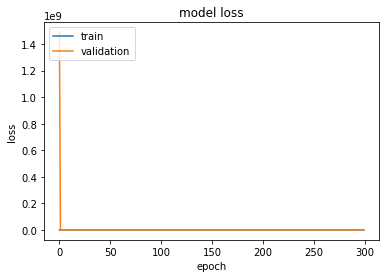

In [13]:
import matplotlib.pyplot as plt 
print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

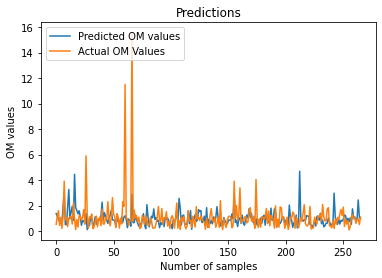

In [14]:

plt.plot(predictions)
plt.plot(y_val)
plt.title('Predictions')
plt.legend(['Predicted OM values', 'Actual OM Values'], loc='upper left')
plt.xlabel('Number of samples')
plt.ylabel('OM values')
plt.legend(['Predicted OM values', 'Actual OM Values'], loc='upper left')
plt.savefig("CNNRegressionForOMUsingAlexNet.jpg")
plt.show()

In [15]:
dataset[0][1].shape

(300, 300, 3)

In [16]:
dataset[0][2]

0.54

In [17]:
import tensorflow as tf

In [18]:
tf.test.gpu_device_name()

'/device:GPU:0'

In [19]:
# mse , mae and r2_score values
mae_value = mean_absolute_error(y_val, predictions)
mse_value = mean_squared_error(y_val, predictions)
r2_score_value = r2_score(y_val, predictions)
# Total error with mse , mae and r2_score
print(f"MSE {mse_value}")
print(f"MAE {mae_value}")
print(f"r2_score {r2_score_value}")

MSE 1.7062314876804163
MAE 0.6595943619039721
r2_score -0.01291648438975801
